<a href="https://colab.research.google.com/github/pitocms/test_image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [57]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [58]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


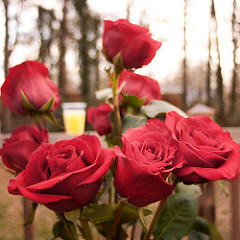

In [59]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

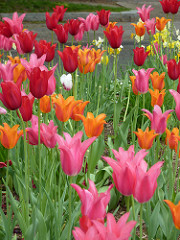

In [69]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [60]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [62]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 97s 1s/step - loss: 1.5529 - accuracy: 0.3279 - val_loss: 1.1012 - val_accuracy: 0.5586
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 1.0144 - accuracy: 0.6128 - val_loss: 0.9853 - val_accuracy: 0.6035
Epoch 3/10
92/92 [==============================] - 95s 1s/step - loss: 0.8396 - accuracy: 0.6696 - val_loss: 0.9569 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 96s 1s/step - loss: 0.6543 - accuracy: 0.7545 - val_loss: 0.9793 - val_accuracy: 0.6267
Epoch 5/10
92/92 [==============================] - 95s 1s/step - loss: 0.4391 - accuracy: 0.8395 - val_loss: 1.1680 - val_accuracy: 0.6335
Epoch 6/10
92/92 [==============================] - 97s 1s/step - loss: 0.2879 - accuracy: 0.8985 - val_loss: 1.4097 - val_accuracy: 0.6322
Epoch 7/10
92/92 [==============================] - 99s 1s/step - loss: 0.1787 - accuracy: 0.9377 - val_loss: 1.7696 - val_accuracy: 0.5804
Epoch 8/10
92/92 [==

In [63]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [64]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [67]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
92/92 [==============================] - 112s 1s/step - loss: 1.5963 - accuracy: 0.3302 - val_loss: 1.1198 - val_accuracy: 0.5300
Epoch 2/30
92/92 [==============================] - 112s 1s/step - loss: 1.0668 - accuracy: 0.5498 - val_loss: 1.0127 - val_accuracy: 0.5967
Epoch 3/30
92/92 [==============================] - 111s 1s/step - loss: 0.9503 - accuracy: 0.6236 - val_loss: 0.9823 - val_accuracy: 0.5967
Epoch 4/30
92/92 [==============================] - 111s 1s/step - loss: 0.8973 - accuracy: 0.6673 - val_loss: 0.9196 - val_accuracy: 0.6431
Epoch 5/30
92/92 [==============================] - 111s 1s/step - loss: 0.8300 - accuracy: 0.6687 - val_loss: 1.0467 - val_accuracy: 0.6240
Epoch 6/30
92/92 [==============================] - 111s 1s/step - loss: 0.8088 - accuracy: 0.6840 - val_loss: 0.8139 - val_accuracy: 0.6880
Epoch 7/30
92/92 [==============================] - 111s 1s/step - loss: 0.7621 - accuracy: 0.6987 - val_loss: 0.9622 - val_accuracy: 0.6240
Epoch 8/30
92

In [85]:

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
rose_url = "https://www.pixelstalk.net/wp-content/uploads/images2/Beautiful-Rose-Wallpaper-Desktop.jpg"

rose_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

print(rose_path)

test_img = keras.preprocessing.image.load_img(
    rose_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)
print(
    "This image most likely  to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
os.remove(rose_path) 

122880/117948 [===============================] - 0s 0us/step
/root/.keras/datasets/Red_sunflower
tf.Tensor([3.2490817e-08 4.6861352e-04 5.0587099e-05 9.9862695e-01 8.5379899e-04], shape=(5,), dtype=float32)
This image most likely  to sunflowers with a 99.86 percent confidence.
